## Table of Contents
[00. Set Up](#00.-Set-Up)
* [00i. Import Packages](#00i.-Import-Packages)
* [00ii. Connect to S3](#00ii.-Connect-to-S3)

[01. Load Data](#01.-Load-Data)
* [01i. Load Data from S3 (Online)](#01i.-Load-Data-from-S3-(Online))
* [01ii. Load Data by Pandas (Local)](#01ii.-Load-Data-by-Pandas-(Local))
* [01iii. View datasets](#01iii.-View-datasets)

[02. Study Data](#02.-Study-Data)
* [02i. Visualise Distributions](#02i.-Visualise-Distributions)
* [02ii. Find State Matches](#02ii.-Find-State-Matches)
* [02iii. Simple Data Processing](#02iii.-Simple-Data-Processing)
* [02iv. Merging Data](#02iv.-Merging-Data)
* [02v. Visualise Time Plots](#02v.-Visualise-Time-Plots)
* [02vi. Export Data](#02vi.-Export-Data)

[03. Feature Engineering](#03.-Feature-Engineering)
* [03i. Load Data](#03i.-Load-Data)
* [03ii. Create Time Labels](#03ii.-Create-Time-Labels)
* [03iii. Clean Missing Variables](#03iii.-Clean-Missing-Variables)
* [03iv. Create Lagged Variables](#03iv.-Create-Lagged-Variables)
* [03v. Export Data](#03v.-Export-Data)

[04. Modelling](#04.-Modelling)
* [04i. Import Packages](#04i.-Import-Packages)
* [04ii. Load Data](#04ii.-Load-Data)
* [04iii. Set Model Variables](#04iii.-Set-Model-Variables)
* [04iv. Quick Visualisations](#04iv.-Quick-Visualisations)
* [04v. Train-Test-Val-Split](#04v.-Train-Test-Val-Split)
* [04vi. Train Model](#04vi.-Train-Model)
* [04vii. Predict & Review](#04vii.-Predict-&-Review)
* [04viii. Export Data](#04viii.-Export-Data)

## 00. Set up

### 00i. Import Packages
Here we load the packages required for EDA & Data Cleaning (Sections 01 & 02)

In [2]:
# import boto3
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# from sagemaker import get_execution_role

### 00ii. Connect to S3
If using on SageMaker, you may load the datasets directly from your S3 bucket. To do so, connect to your bucket using the 'boto3' package and find the name of your bucket accordingly using 'ls'

In [3]:
# s3 = boto3.resource('s3')
# # listing buckets
# ! aws s3 ls

In [4]:
# # show files in bucket
# ! aws s3 ls wwcode-covid-datasets/ --recursive

## 01. Load Data

### 01i. Load Data from S3 (Online)
Noting the name of your file as 'data_key', load your files accordingly into a pandas dataframe.

In [5]:
# def load_data_from_s3(bucket, data_key):
#     data_location = 's3://{}/{}'.format(bucket, data_key)
#     data = pd.read_csv(data_location)
#     return data

In [6]:
# role = get_execution_role()
# bucket='wwcode-covid-datasets'

# # covid data figures
# data_key = 'coronadatascraper/202007270201/coronadatascraper-timeseries__202007270201__202007270201.csv.gz'
# covid_df = load_data_from_s3(bucket, data_key)

# # mobility data figures
# data_key = 'apple-mobility-trends-reports/dataset/apple-mobility-trends-reports.csv'
# mobility_df = load_data_from_s3(bucket, data_key)

### 01ii. Load Data by Pandas (Local)
Alternatively, if you are running locally from your desktop/laptop, you can load your datasets saved in a 'data' folder in the same folder as this script. You may of course, save your datasets elsewhere but rename the paths accordingly.

In [7]:
# source: https://aws.amazon.com/marketplace/pp/prodview-vtnf3vvvheqzw?ref_=srh_res_product_title#pricing
covid_df = pd.read_csv('data/coronadatascraper_202008100200_coronadatascraper-timeseries__202008100200__202008100200.csv.gz', compression='gzip', error_bad_lines=False)
# source: https://aws.amazon.com/marketplace/pp/COVID-19-Apple-Mobility-Trends-Reports/prodview-ucdg4nudicxzi#pricing
aapl_mobility_df = pd.read_csv('data/apple-mobility-trends-reports_dataset_apple-mobility-trends-reports.csv')
# source: https://aws.amazon.com/marketplace/pp/Google-COVID-19-Community-Mobility-Reports/prodview-crrq42gujge3k
goog_mobility_df = pd.read_csv('data/Global_Mobility_Report.txt')
# source: https://data.bts.gov/Research-and-Statistics/Trips-by-Distance/w96p-f2qv
bts_mobility_df = pd.read_csv('data/Trips_by_Distance.csv')
# source: https://rt.live/
rt_df = pd.read_csv('data/rt.csv')
# source: https://www.kaggle.com/lin0li/us-lockdown-dates-dataset
# initially missing reopening info, add info taken from below
lockdown_df = pd.read_csv('data/lockdown_us.csv')
# source: https://aws.amazon.com/marketplace/pp/COVID-19-United-States-Reopen-and-Shut-Down-Status/prodview-ejbvrkmiwc5so
state_codes = pd.read_csv('data/nyt-states-reopen-status-covid-19.txt', usecols=[0,1], header=0)
# source: https://oikolab.com/
weather_df = pd.read_csv('data/weather_usa_states.csv')

### 01iii. View datasets
In the following sub-section, we are familiarising ourselves with the columns and type of variables available. 
Explore if there are any missing information in this quick view.<br>
For the datasets that rely on state abbreviation instead of fullname state spellings as state values, we have to create a mapping for them. We use our pre-loaded 'state_codes' dataframe to do a quick merge.

In [8]:
print(max(covid_df['date']))
covid_df.head()

2020-07-12


,name,level,city,county,state,country,population,lat,long,url,...,tested,hospitalized,hospitalized_current,discharged,icu,icu_current,growthfactor,date,last_updated_at,state_fips
0,"Antwerp, Flanders, Belgium",county,NaN,Antwerp,Flanders,Belgium,1847486.0,51.2485,4.7175,https://epistat.wiv-isp.be/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-22,2020-08-10T02:00:22,NaN
1,"Antwerp, Flanders, Belgium",county,NaN,Antwerp,Flanders,Belgium,1847486.0,51.2485,4.7175,https://epistat.wiv-isp.be/,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-01-23,2020-08-10T02:00:22,NaN
2,"Antwerp, Flanders, Belgium",county,NaN,Antwerp,Flanders,Belgium,1847486.0,51.2485,4.7175,https://epistat.wiv-isp.be/,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-01-24,2020-08-10T02:00:22,NaN
3,"Antwerp, Flanders, Belgium",county,NaN,Antwerp,Flanders,Belgium,1847486.0,51.2485,4.7175,https://epistat.wiv-isp.be/,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-01-25,2020-08-10T02:00:22,NaN
4,"Antwerp, Flanders, Belgium",county,NaN,Antwerp,Flanders,Belgium,1847486.0,51.2485,4.7175,https://epistat.wiv-isp.be/,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-01-26,2020-08-10T02:00:22,NaN


In [9]:
aapl_mobility_df.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,176.53,197.01,233.20,229.20,213.40,193.56,201.82,187.74,203.09,218.60
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,121.19,124.26,156.25,137.10,152.20,140.26,152.96,144.52,150.49,151.17
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,59.01,64.67,64.46,37.16,55.03,57.82,58.69,57.83,66.13,63.37
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,46.18,48.13,48.92,31.31,44.05,49.23,47.49,43.61,48.15,48.86
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,98.44,101.88,88.20,87.57,86.67,88.74,87.77,92.37,90.20,73.91


In [10]:
print(max(goog_mobility_df['date']))
goog_mobility_df.head()

2020-07-25


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [11]:
bts_mobility_df = bts_mobility_df.merge(state_codes, how='left', left_on='State Postal Code', right_on='state_abbreviation')
print(max(bts_mobility_df['Date']))
bts_mobility_df.head()

2020/07/25


,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,state_abbreviation,state
0,County,2020/07/06,1.0,AL,1001.0,Autauga County,10037.0,45564.0,153720.0,34877.0,...,19325.0,22358.0,28807.0,7093.0,3443.0,1209.0,351.0,32.0,AL,Alabama
1,County,2020/07/06,1.0,AL,1003.0,Baldwin County,42138.0,175884.0,547365.0,104145.0,...,69655.0,87790.0,93527.0,31928.0,9353.0,7697.0,3188.0,377.0,AL,Alabama
2,County,2020/07/06,1.0,AL,1005.0,Barbour County,4039.0,20842.0,74391.0,13459.0,...,10155.0,10947.0,11129.0,6185.0,3292.0,625.0,136.0,0.0,AL,Alabama
3,County,2020/07/06,1.0,AL,1007.0,Bibb County,3508.0,18892.0,59988.0,13862.0,...,6884.0,7900.0,7704.0,7061.0,1501.0,840.0,174.0,55.0,AL,Alabama
4,County,2020/07/06,1.0,AL,1009.0,Blount County,8388.0,49452.0,170776.0,32254.0,...,21186.0,25098.0,29347.0,19206.0,5148.0,1542.0,419.0,173.0,AL,Alabama


In [12]:
rt_df = rt_df.merge(state_codes, how='left', left_on='region', right_on='state_abbreviation')
print(max(rt_df['date']))
rt_df.head()

2020-08-04


,date,region,index,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests,new_tests,new_cases,new_deaths,state_abbreviation,state
0,2020-03-02,ME,0,1.364230,1.350196,1.141386,1.567044,55.273425,0.0,0.0,0.0,0.0,NaN,NaN,NaN,ME,Maine
1,2020-03-03,ME,1,1.357175,1.346643,1.136603,1.547448,0.538724,0.0,0.0,0.0,0.0,NaN,NaN,NaN,ME,Maine
2,2020-03-04,ME,2,1.351634,1.340184,1.142682,1.547002,7.637654,0.0,0.0,0.0,0.0,NaN,NaN,NaN,ME,Maine
3,2020-03-05,ME,3,1.345538,1.337814,1.167782,1.557326,14.489647,0.0,0.0,0.0,0.0,NaN,NaN,NaN,ME,Maine
4,2020-03-06,ME,4,1.337298,1.327954,1.159661,1.525446,15.583612,0.0,0.0,0.0,0.0,NaN,NaN,NaN,ME,Maine


In [13]:
lockdown_df.head()

,Country,State,County,Date,Type
0,United States,Alabama,NaN,4/4/2020,Stay at home
1,United States,Alabama,Birmingham,24/3/2020,Shelter in place
2,United States,Alaska,NaN,28/3/2020,Stay at home
3,United States,Arizona,NaN,31/3/2020,Stay at home
4,United States,California,NaN,19/3/2020,Stay at home


In [14]:
weather_df['date'] = pd.to_datetime(weather_df['date'], format="%d/%m/%Y")
print(max(weather_df['date']))
weather_df.head()

2020-08-07 00:00:00


,date,temperature_median_degC,wind_speed_median_m/s,state
0,2020-01-01,9.555,1.860,Alabama
1,2020-01-02,12.385,4.855,Alabama
2,2020-01-03,17.030,2.165,Alabama
3,2020-01-04,12.450,4.600,Alabama
4,2020-01-05,6.480,1.945,Alabama


## 02. Study Data

### 02i. Visualise Distributions
In the following section, we are doing some quick visualisations of some of our datasets.
* For numerical variables, we are observing the distribution of the values.
* For categorical variables, we are observing a count plot of the top 10 values.

In [16]:
def get_data_info_by_columns(data, cols = 'unspecified'):
    if cols == 'unspecified':
        cols = data.columns
    for col in cols:
        print('Displaying info for column "'+col+'"...')
        if np.issubdtype(data[col].dtype, np.number):
            ax = sns.distplot(data[col])
        else:
            ax = sns.countplot(x=col, data=data, order=data[col].value_counts().iloc[:10].index)
        plt.show()

Displaying info for column "name"...


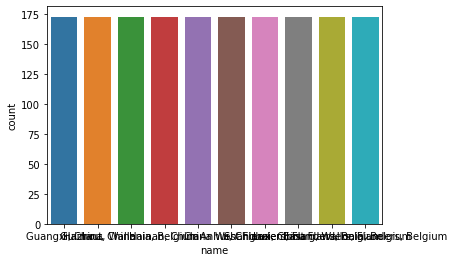

Displaying info for column "level"...


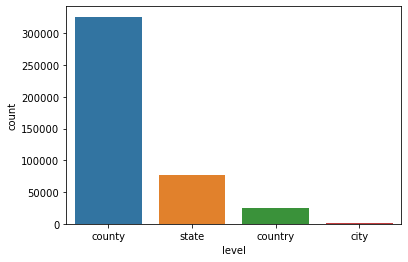

Displaying info for column "city"...


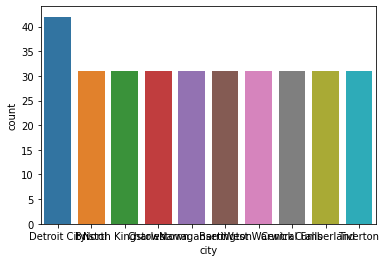

Displaying info for column "county"...


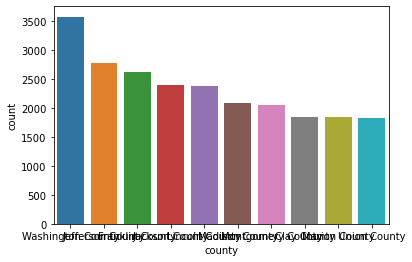

Displaying info for column "state"...


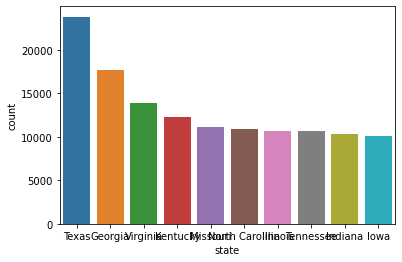

Displaying info for column "country"...


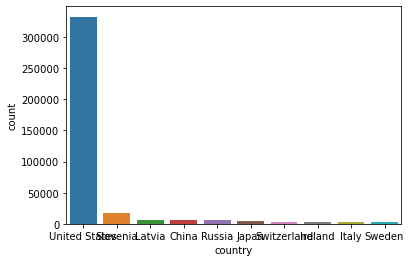

Displaying info for column "population"...


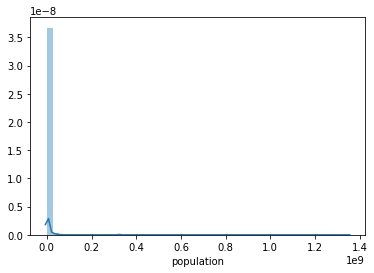

Displaying info for column "lat"...


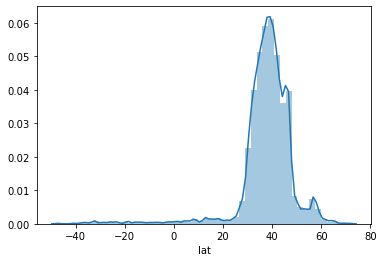

Displaying info for column "long"...


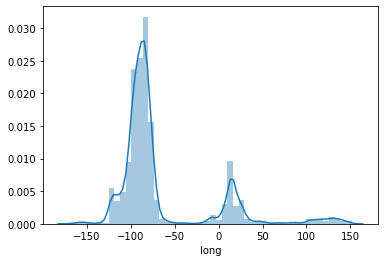

Displaying info for column "url"...


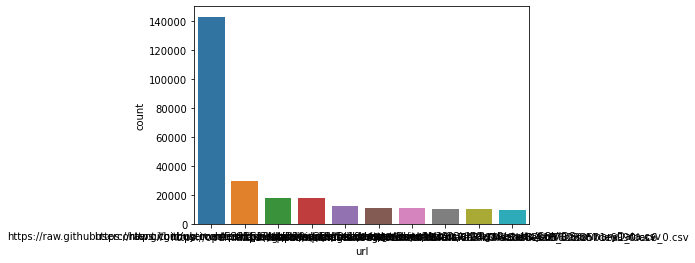

Displaying info for column "aggregate"...


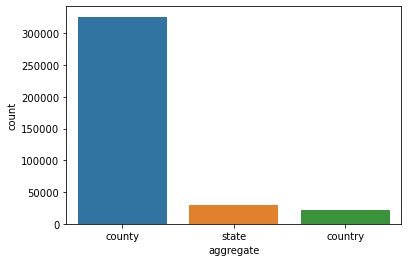

Displaying info for column "tz"...


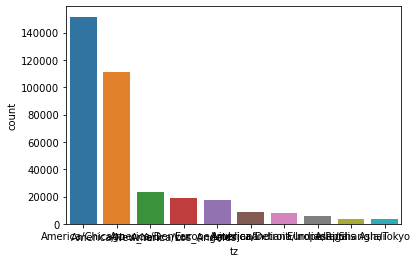

Displaying info for column "cases"...


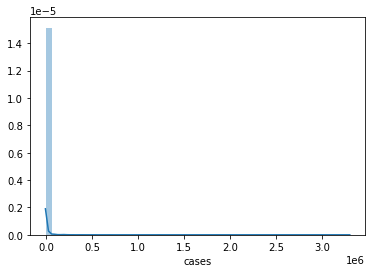

Displaying info for column "deaths"...


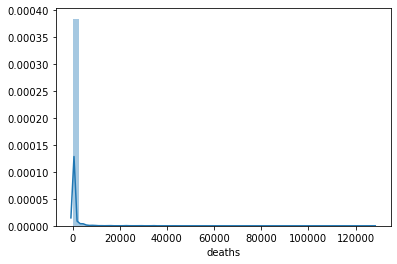

Displaying info for column "recovered"...


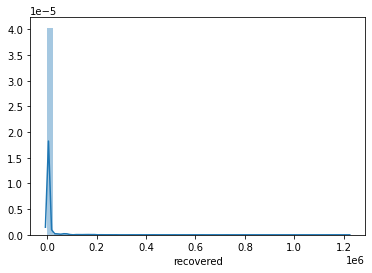

Displaying info for column "active"...


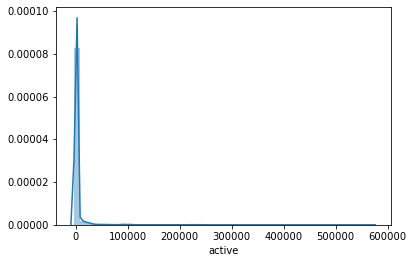

Displaying info for column "tested"...


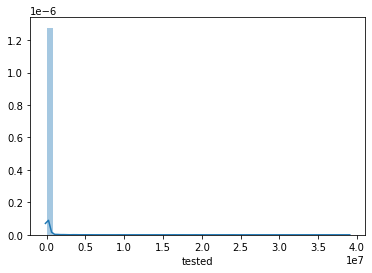

Displaying info for column "hospitalized"...


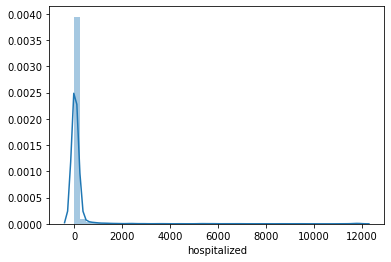

Displaying info for column "hospitalized_current"...


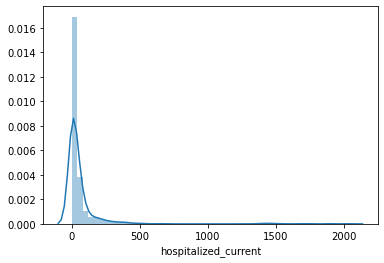

Displaying info for column "discharged"...


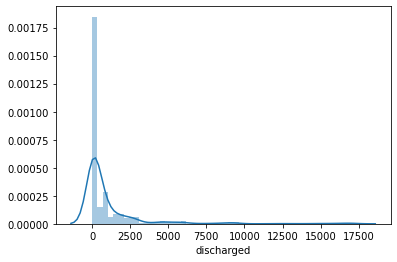

Displaying info for column "icu"...


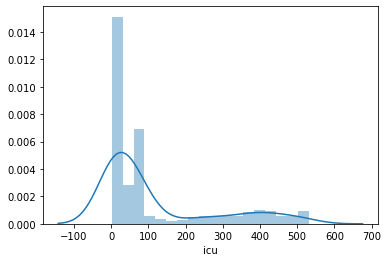

Displaying info for column "icu_current"...


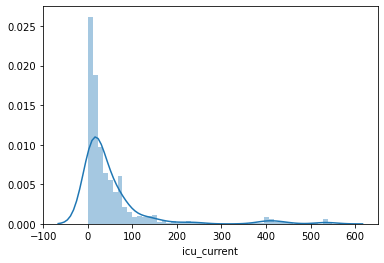

Displaying info for column "growthfactor"...


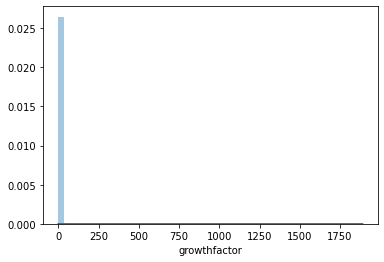

Displaying info for column "date"...


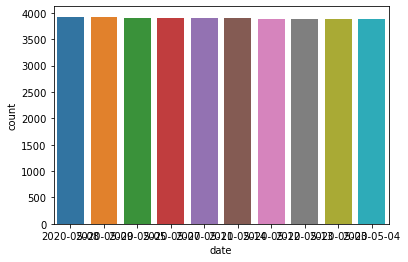

Displaying info for column "last_updated_at"...


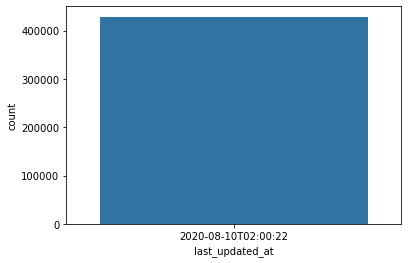

Displaying info for column "state_fips"...


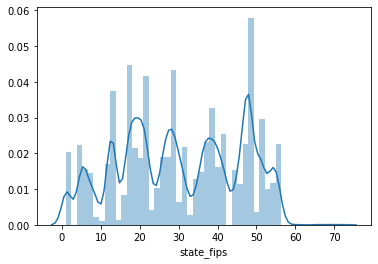

In [17]:
get_data_info_by_columns(covid_df)

In [18]:
print(aapl_mobility_df.columns)

Index(['geo_type', 'region', 'transportation_type', 'alternative_name',
       'sub-region', 'country', '2020-01-13', '2020-01-14', '2020-01-15',
       '2020-01-16',
       ...
       '2020-07-30', '2020-07-31', '2020-08-01', '2020-08-02', '2020-08-03',
       '2020-08-04', '2020-08-05', '2020-08-06', '2020-08-07', '2020-08-08'],
      dtype='object', length=215)


Displaying info for column "geo_type"...


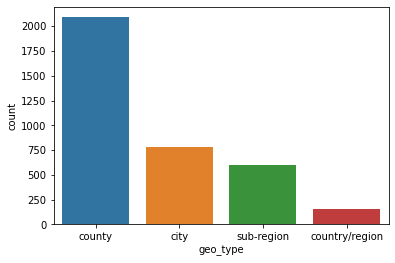

Displaying info for column "region"...


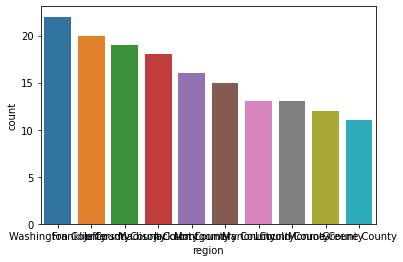

Displaying info for column "transportation_type"...


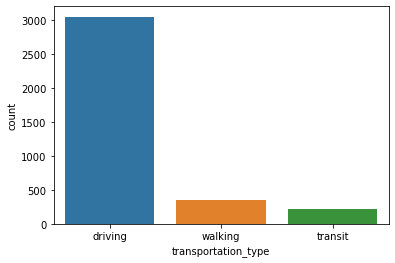

Displaying info for column "alternative_name"...


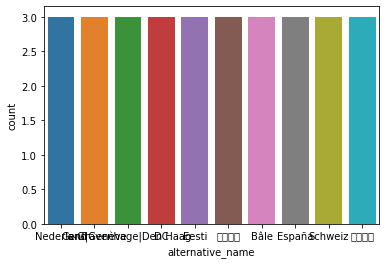

Displaying info for column "sub-region"...


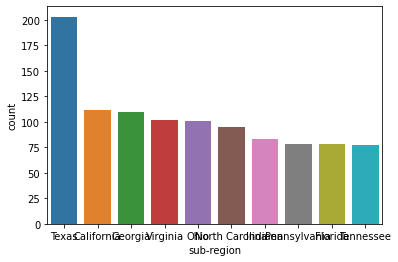

Displaying info for column "country"...


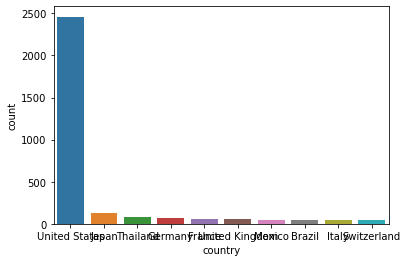

Displaying info for column "2020-01-13"...


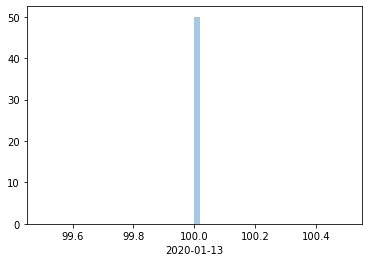

Displaying info for column "2020-01-14"...


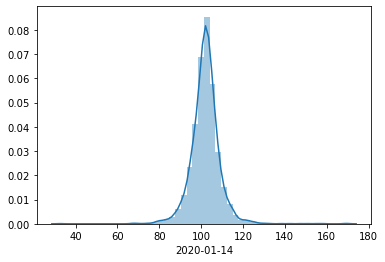

Displaying info for column "2020-01-15"...


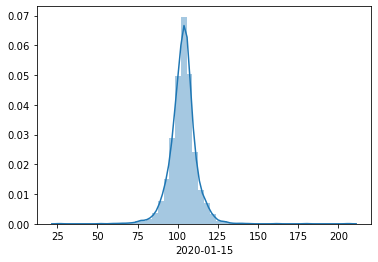

Displaying info for column "2020-07-23"...


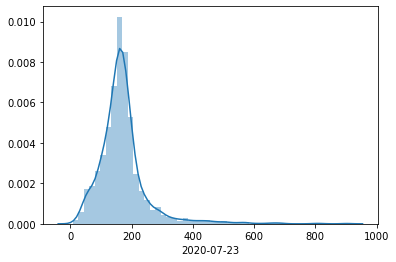

Displaying info for column "2020-07-24"...


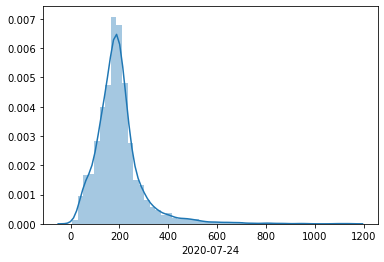

Displaying info for column "2020-07-25"...


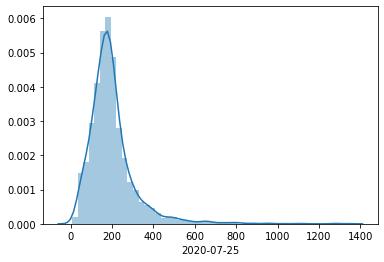

In [19]:
get_data_info_by_columns(aapl_mobility_df, cols=['geo_type', 'region', 'transportation_type', 'alternative_name', 'sub-region', 
                                            'country', '2020-01-13', '2020-01-14', '2020-01-15', '2020-07-23', '2020-07-24', '2020-07-25'])

Displaying info for column "country_region_code"...


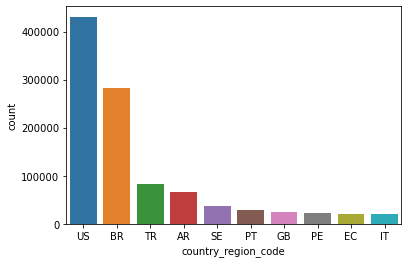

Displaying info for column "country_region"...


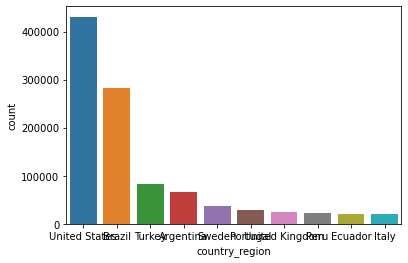

Displaying info for column "sub_region_1"...


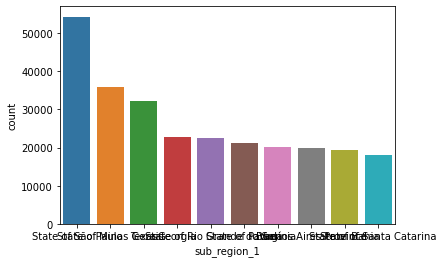

Displaying info for column "sub_region_2"...


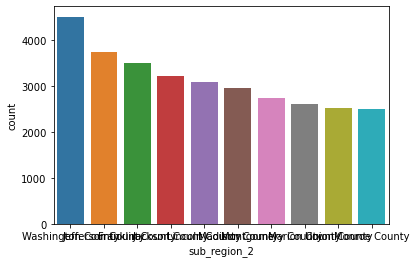

Displaying info for column "metro_area"...


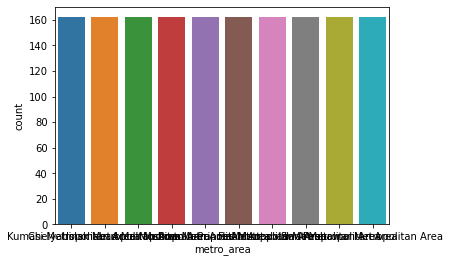

Displaying info for column "iso_3166_2_code"...


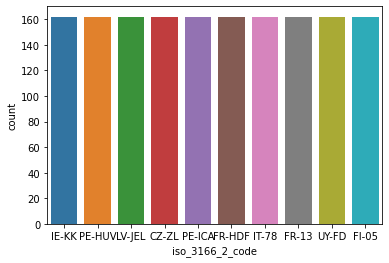

Displaying info for column "census_fips_code"...


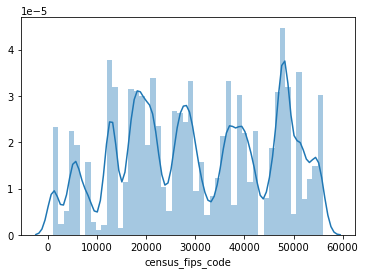

Displaying info for column "date"...


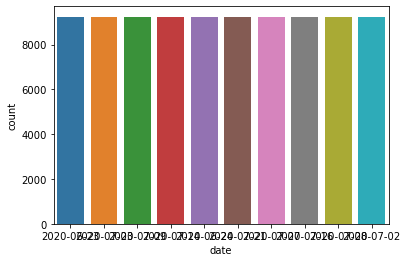

Displaying info for column "retail_and_recreation_percent_change_from_baseline"...


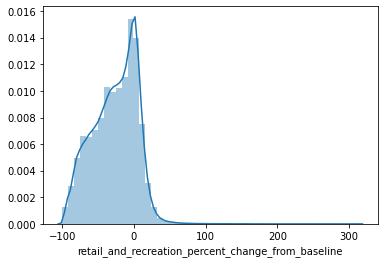

Displaying info for column "grocery_and_pharmacy_percent_change_from_baseline"...


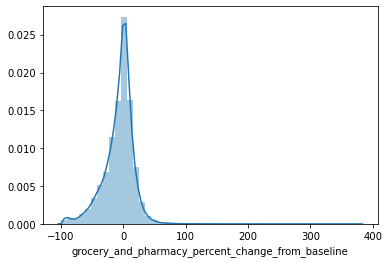

Displaying info for column "parks_percent_change_from_baseline"...


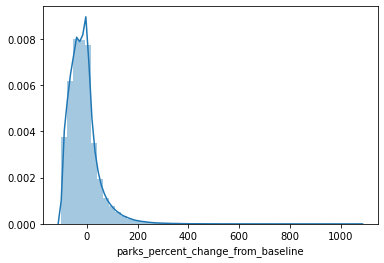

Displaying info for column "transit_stations_percent_change_from_baseline"...


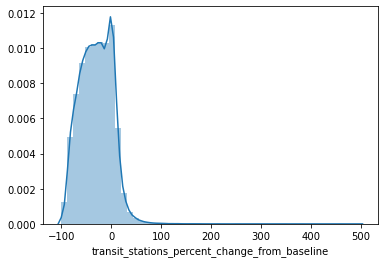

Displaying info for column "workplaces_percent_change_from_baseline"...


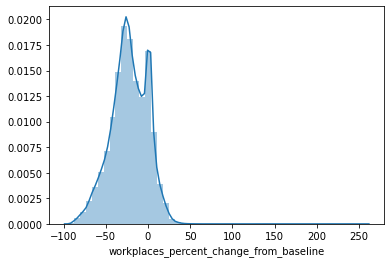

Displaying info for column "residential_percent_change_from_baseline"...


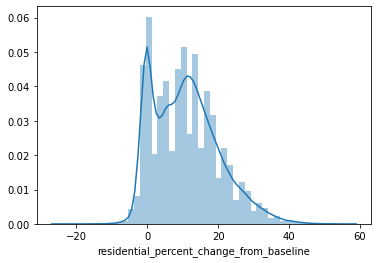

In [20]:
get_data_info_by_columns(goog_mobility_df)

Displaying info for column "Level"...


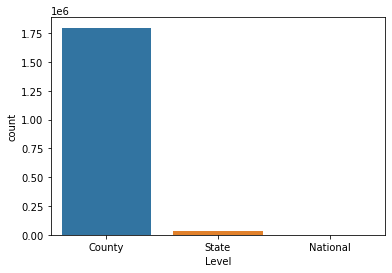

Displaying info for column "Date"...


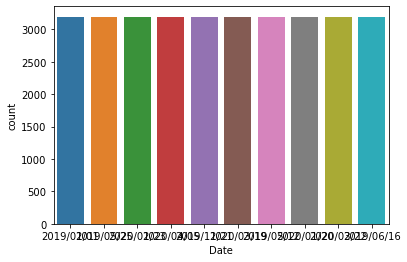

Displaying info for column "State FIPS"...


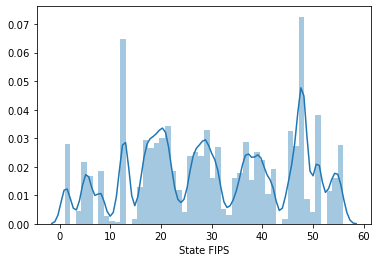

Displaying info for column "State Postal Code"...


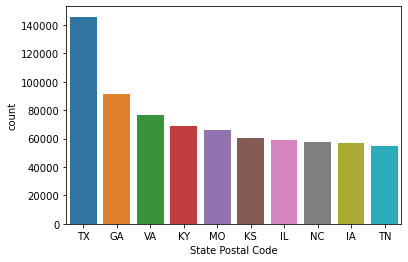

Displaying info for column "County FIPS"...


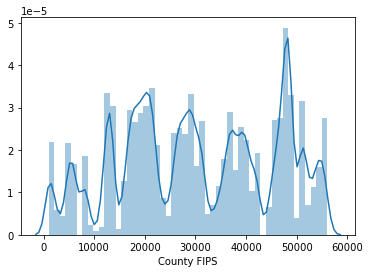

Displaying info for column "County Name"...


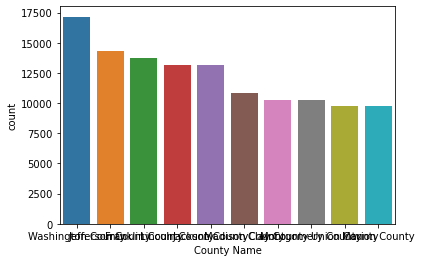

Displaying info for column "Population Staying at Home"...


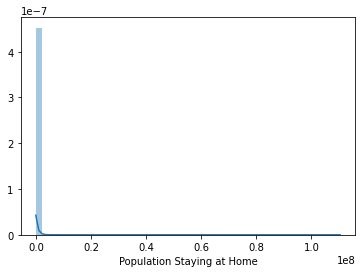

Displaying info for column "Population Not Staying at Home"...


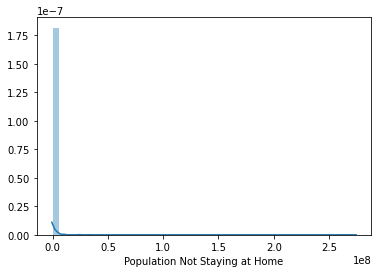

Displaying info for column "Number of Trips"...


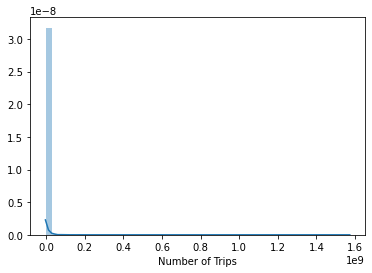

Displaying info for column "Number of Trips <1"...


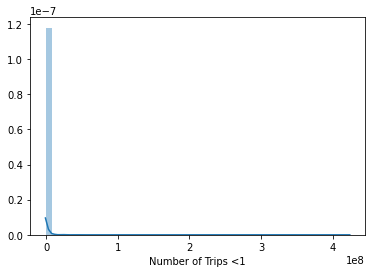

Displaying info for column "Number of Trips 1-3"...


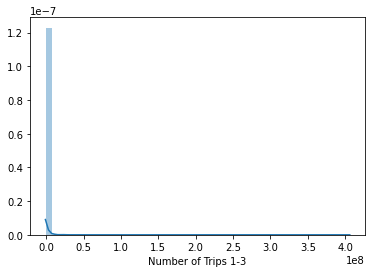

Displaying info for column "Number of Trips 3-5"...


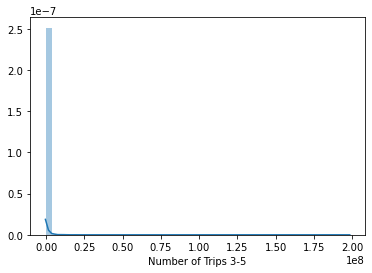

Displaying info for column "Number of Trips 5-10"...


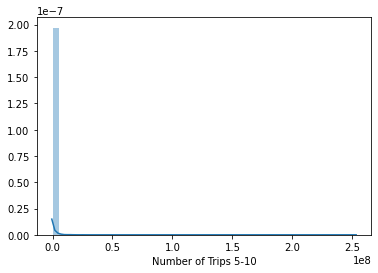

Displaying info for column "Number of Trips 10-25"...


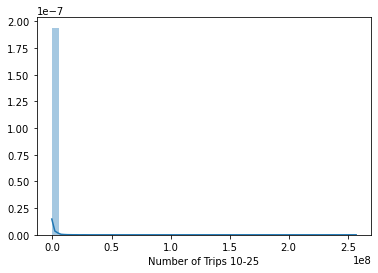

Displaying info for column "Number of Trips 25-50"...


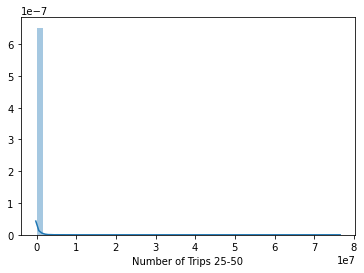

Displaying info for column "Number of Trips 50-100"...


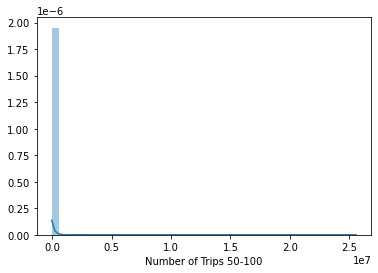

Displaying info for column "Number of Trips 100-250"...


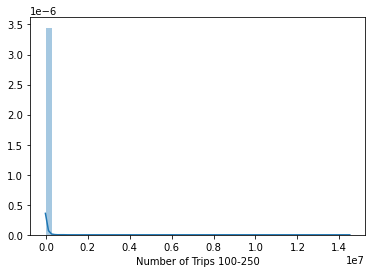

Displaying info for column "Number of Trips 250-500"...


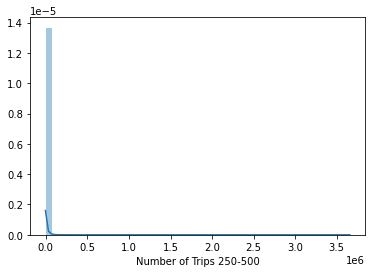

Displaying info for column "Number of Trips >=500"...


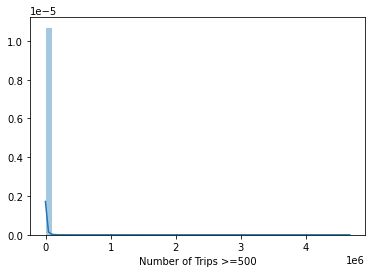

Displaying info for column "state_abbreviation"...


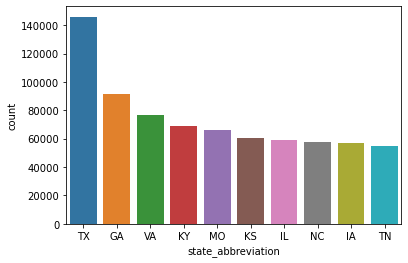

Displaying info for column "state"...


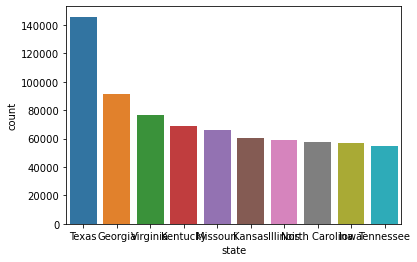

In [21]:
get_data_info_by_columns(bts_mobility_df)

### 02ii. Find State Matches
Due to the sheer number of datasets we are using, it is inevitable that different datasets might spell state names differently. In our study, we are focusing on United States, so we first filter the country information out.<br>
Subsequently, we are going to compare the differences in spelling across all datasets for states.<br>
It is important to ensure consistent spelling for state as we are going to merge all datasets on this column later. Having different spelling means that Python will not be able to merge properly, creating duplicate and null rows at the same time which can be problematic for analysis.

In [22]:
# filter by usa 
usa_covid_df = covid_df[covid_df['country']=='United States']
usa_aapl_df = aapl_mobility_df[aapl_mobility_df['country']=='United States']
usa_goog_df = goog_mobility_df[goog_mobility_df['country_region']=='United States']

In [23]:
def state_checking_function(usa_covid_df, usa_goog_df, usa_aapl_df, bts_mobility_df, rt_df, lockdown_df, weather_df, missing_val = ""):
    # get list of states per dataset
    usa_covid_states = list(set(usa_covid_df['state']))
    usa_goog_states = list(set(usa_goog_df['sub_region_1']))
    usa_aapl_states = list(set(usa_aapl_df['sub-region']))
    bts_df_states = list(set(bts_mobility_df['state']))
    rt_df_states = list(set(rt_df['state']))
    lockdown_df_states = list(set(lockdown_df['State']))
    weather_df_states = list(set(weather_df['state']))

    # get unique list of states across datasets
    list_of_states = list(set(usa_covid_states+usa_goog_states+usa_aapl_states+bts_df_states
                              +rt_df_states+lockdown_df_states+weather_df_states))

    state_checking_df = pd.DataFrame()
    state_checking_df['state_names'] = list_of_states

    for state_list, data_name in zip([usa_covid_states, usa_goog_states, usa_aapl_states, bts_df_states, 
                                      rt_df_states, lockdown_df_states, weather_df_states], 
                                     ['covid_cases', 'google_mob', 'apple_mob', 'bts_mob', 'risk_trans', 'lockdown', 'weather']):
        state_checking_df[data_name]=[missing_val if i in state_list else "Missing" for i in list_of_states]
    
    return state_checking_df

In [24]:
# eye-ball state name discrepancies
state_checking_function(usa_covid_df, usa_goog_df, usa_aapl_df, bts_mobility_df, rt_df, lockdown_df, weather_df)

,state_names,covid_cases,google_mob,apple_mob,bts_mob,risk_trans,lockdown,weather
0,NaN,,,,,Missing,Missing,Missing
1,Hawaii,,,,,,,
2,Massachusetts,,,,,,,
3,New Hampshire,,,,,,,
4,New Jersey,,,,,,,
5,Oklahoma,,,,,,,
6,Idaho,,,,,,,
7,Mississippi,,,,,,,
8,Puerto Rico,,Missing,,Missing,Missing,,Missing
9,Michigan,,,,,,,


### 02iii. Simple Data Processing

##### based on above investigation, correct State spellings for some datasets
In the following sub-section, we are using a dictionary to find and replace "mispelled" state terms. We are taking rt_df as the baseline state spelling and comparison, as we are eventually going to use rt information as our predictor (y). If rt has missing states, we can't predict on them anyway. Hence, although also undesirable, it does not really affect prediction (It just means we are perhaps excluding on prediction for a certain state completely). <br>
However, if rt has the state whereas other datasets don't, and we merge on them, we will end up having missing X feature variables in our model, affecting model predictions.

In [25]:
# replace following, rest are ignored
find_and_replace_dictionary = {
    'Washington, D.C.': 'District of Columbia',
    'United States Virgin Islands': 'Virgin Islands',
}
usa_covid_df['state'] = usa_covid_df['state'].apply(
    lambda x: find_and_replace_dictionary[x] if x in find_and_replace_dictionary.keys() else x
)
usa_goog_df['sub_region_1'] = usa_goog_df['sub_region_1'].apply(
    lambda x: find_and_replace_dictionary[x] if x in find_and_replace_dictionary.keys() else x
)
usa_aapl_df['sub-region'] = usa_aapl_df['sub-region'].apply(
    lambda x: find_and_replace_dictionary[x] if x in find_and_replace_dictionary.keys() else x
)

# check if improved (rt will be baseline to get states from)
# eye-ball state name discrepancies
state_checking_df = state_checking_function(usa_covid_df, usa_goog_df, usa_aapl_df, bts_mobility_df, rt_df, lockdown_df, weather_df, missing_val=np.nan)
state_checking_df[state_checking_df['risk_trans']!='Missing'].dropna(how='all', subset=[i for i in state_checking_df if i!='state_names'])

,state_names,covid_cases,google_mob,apple_mob,bts_mob,risk_trans,lockdown,weather
29,District of Columbia,NaN,NaN,Missing,NaN,NaN,NaN,NaN


##### further clean codes to ensure each row represents a unique State x Date
Some of our datasets are at county level, or have various levels past the State level that we need. We need to condense the information into State x Date level. We shall refer to State x Date as the index of our merged dataset.<br>
Ultimately, we want each merged row to represent a State for each Date. We don't want >1 row representing this information in any dataset prior to merge, as this will be problematic to clean later once we merge and the rows duplicate further.

In [26]:
index_cols = ['date','state']
def check_if_unique_index(data, index_col = index_cols):
    print(len(data.drop_duplicates(subset=index_col))==len(data))

In [27]:
# covid_cases dataset
factor_columns = ['population', 'lat', 'long', 'cases', 'deaths', 'recovered', 'active', 'tested', 'hospitalized', 'discharged', 'icu']
usa_covid_state_df = usa_covid_df[usa_covid_df['level']=='state'].reset_index()
usa_covid_state_df = usa_covid_state_df[['state', 'date']+factor_columns].drop_duplicates()
check_if_unique_index(usa_covid_state_df, index_col = index_cols)

True


In [28]:
# google review
# see the following to show "iso_3166_2_code" represents statelevel
# usa_goog_df[(usa_goog_df['sub_region_1']=='Alabama') & (usa_goog_df['date']=='2020-02-15')]
usa_goog_df_test = usa_goog_df.dropna(subset=['iso_3166_2_code'])
usa_goog_df_test[usa_goog_df_test.duplicated(subset=['date','sub_region_1'])]

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline


In [29]:
# google mobility dataset
usa_goog_state_df = usa_goog_df.dropna(subset=['iso_3166_2_code'])
usa_goog_state_df = usa_goog_state_df.drop(columns=['iso_3166_2_code','census_fips_code', 'sub_region_2', 'metro_area', 'country_region_code'])
check_if_unique_index(usa_goog_state_df, index_col = ['date','sub_region_1'])
usa_goog_state_df.head()

True


,country_region,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
878361,United States,Alabama,2020-02-15,5.0,2.0,39.0,7.0,2.0,-1.0
878362,United States,Alabama,2020-02-16,0.0,-2.0,-7.0,3.0,-1.0,1.0
878363,United States,Alabama,2020-02-17,3.0,0.0,17.0,7.0,-17.0,4.0
878364,United States,Alabama,2020-02-18,-4.0,-3.0,-11.0,-1.0,1.0,2.0
878365,United States,Alabama,2020-02-19,4.0,1.0,6.0,4.0,1.0,0.0


In [30]:
# apple mobility dataset
group_cols = ['geo_type', 'transportation_type', 'sub-region']
usa_aapl_df_grouped = usa_aapl_df.groupby(group_cols).apply(lambda g: g.mean(skipna=False)).reset_index().rename(
    columns={'level_3': 'date', 0: 'mobility'}).dropna(subset=['mobility']).reset_index(drop=True)
unstack_cols = ['geo_type', 'transportation_type']
usa_aapl_state_df = usa_aapl_df_grouped.set_index(unstack_cols+['date','sub-region']).unstack(unstack_cols).reset_index()
usa_aapl_state_df.columns = usa_aapl_state_df.columns.map('_'.join).str.strip('_')
check_if_unique_index(usa_aapl_state_df, index_col = ['date','sub-region'])
usa_aapl_state_df.head()

True


,date,sub-region,mobility_city_driving,mobility_city_transit,mobility_city_walking,mobility_county_driving
0,2020-01-13,Alabama,100.0,100.0,100.0,100.0
1,2020-01-13,Alaska,100.0,NaN,100.0,100.0
2,2020-01-13,Arizona,100.0,100.0,100.0,100.0
3,2020-01-13,Arkansas,NaN,NaN,NaN,100.0
4,2020-01-13,California,100.0,100.0,100.0,100.0


In [31]:
# bts mobility dataset
usa_bts_state_df = bts_mobility_df[bts_mobility_df['Level']=='State']
check_if_unique_index(usa_bts_state_df, index_col = ['Date','state'])

True


In [32]:
# remaining datasets
check_if_unique_index(rt_df, index_col = index_cols)
check_if_unique_index(lockdown_df, index_col = ['Date','State'])
check_if_unique_index(weather_df, index_col = index_cols)

True
False
True


In [33]:
# lockdown dataset (remove county level, take most common)
# usa_lockdown_state_df = lockdown_df.groupby(['Country','State','Date'])['Type'].agg(lambda x:x.value_counts().index[0]).reset_index()
usa_lockdown_state_df = lockdown_df[lockdown_df['County'].isna()].drop(columns=['County'])
check_if_unique_index(usa_lockdown_state_df, index_col = ['Date','State'])
usa_lockdown_state_df.head()

True


,Country,State,Date,Type
0,United States,Alabama,4/4/2020,Stay at home
2,United States,Alaska,28/3/2020,Stay at home
3,United States,Arizona,31/3/2020,Stay at home
4,United States,California,19/3/2020,Stay at home
5,United States,Colorado,26/3/2020,Stay at home


##### final check on unique index

In [34]:
# FINAL DATASETS (SHOULD ALL PRINT TRUE!)
check_if_unique_index(usa_covid_state_df, index_col = index_cols)
check_if_unique_index(usa_goog_state_df, index_col = ['date','sub_region_1'])
check_if_unique_index(usa_aapl_state_df, index_col = ['date','sub-region'])
check_if_unique_index(usa_bts_state_df, index_col = ['Date','state'])
check_if_unique_index(rt_df, index_col = index_cols)
check_if_unique_index(usa_lockdown_state_df, index_col = ['Date','State'])
check_if_unique_index(weather_df, index_col = index_cols)

True
True
True
True
True
True
True


### 02iv. Merging Data
Now that we are confident that the index is unique per dataset, we can do formatting for date column and merge on the index_cols per data.

In [35]:
# format all date columns into right date type
rt_df['date'] = pd.to_datetime(rt_df['date'])
usa_covid_state_df['date'] = pd.to_datetime(usa_covid_state_df['date'])
usa_goog_state_df['date'] = pd.to_datetime(usa_goog_state_df['date'])
usa_aapl_state_df['date'] = pd.to_datetime(usa_aapl_state_df['date'])
usa_bts_state_df['Date'] = pd.to_datetime(usa_bts_state_df['Date'])
usa_lockdown_state_df['Date'] = pd.to_datetime(usa_lockdown_state_df['Date'])

In [36]:
# note we only want to analyse states available in RT data
usa_merged_data = rt_df.merge(usa_covid_state_df,
    how = 'left', on = index_cols
)
usa_merged_data = usa_merged_data.merge(usa_goog_state_df,
    how = 'left', left_on = index_cols, right_on = ['date','sub_region_1']
)
usa_merged_data = usa_merged_data.merge(usa_aapl_state_df,
    how = 'left', left_on = index_cols, right_on = ['date','sub-region']
)
usa_merged_data = usa_merged_data.merge(usa_bts_state_df,
    how = 'left', left_on = index_cols, right_on = ['Date','state']
)
usa_merged_data = usa_merged_data.merge(usa_lockdown_state_df,
    how = 'left', left_on = index_cols, right_on = ['Date','State']
)
usa_merged_data = usa_merged_data.merge(weather_df,
    how = 'left', on = index_cols
)
usa_merged_data = usa_merged_data.drop(columns=['Country', 'Date_x', 'Date_y', 'index', 'State', 'sub_region_1', 'sub-region'])

One dataset that might be tricky is the lockdown dataset. It represents each date that the state makes some official changes (E.g. Lockdown, reopen, stay-home notice, etc.). Intuitively, if the state officially announces Lockdown on 03 April 2020 and then announces reopening in 03 May 2020, we can forward fill the lockdown status between 04 April to 02 May to also be 'Lockdown'.<br>
This is exactly what we do here, making sure to forward fill (ffill) by grouping each state up.

In [37]:
# impute 'Type' into date period
usa_merged_data = usa_merged_data.sort_values(by=index_cols, ascending=True)
usa_merged_data['lockdown_status'] = usa_merged_data.groupby('state')['Type'].transform(lambda v: v.ffill())
usa_merged_data

,date,region,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,...,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,state_abbreviation_y,Type,temperature_median_degC,wind_speed_median_m/s,lockdown_status
7168,2020-01-19,WA,1.931525,1.905408,1.634723,2.261970,5.764968,0.000000,0.000000,0.0,...,913989.0,321907.0,109664.0,18372.0,26710.0,WA,NaN,-0.805,0.755,NaN
7169,2020-01-20,WA,1.933600,1.912357,1.632484,2.231387,0.078372,0.000000,0.000000,0.0,...,1162325.0,343337.0,115189.0,19005.0,26220.0,WA,NaN,0.440,0.740,NaN
7170,2020-01-21,WA,1.934562,1.912743,1.612060,2.201965,1.111411,0.000000,0.000000,0.0,...,1191838.0,290505.0,91211.0,15337.0,27646.0,WA,NaN,0.420,1.120,NaN
7171,2020-01-22,WA,1.938330,1.918763,1.606901,2.175183,2.116840,0.000000,0.000000,0.0,...,1217566.0,291011.0,89945.0,15132.0,23702.0,WA,NaN,-0.640,1.025,NaN
7172,2020-01-23,WA,1.944462,1.930613,1.634181,2.173330,2.347955,0.000000,0.000000,0.0,...,1193163.0,291217.0,98306.0,16494.0,26138.0,WA,NaN,1.130,0.480,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,2020-08-04,VA,1.095193,1.073094,0.857368,1.280160,712.658601,606.281952,704.385853,1145.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.960,2.495,Reopened
7366,2020-08-04,WA,1.093348,1.071202,0.866010,1.323259,472.170826,409.217293,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.830,2.120,Reopened
3036,2020-08-04,WV,0.954022,0.941262,0.721038,1.118741,63.744987,76.394952,52.121495,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.065,1.605,Reopened
4157,2020-08-04,WI,0.920006,0.904811,0.702986,1.083945,321.685357,402.349467,260.292095,770.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.055,2.170,Reopened


In [38]:
# review jarring missing info that might need to be cleaned/excluded
usa_merged_data.isna().sum()

date                          0
region                        0
mean                          0
median                        0
lower_80                      0
                           ... 
state_abbreviation_y        510
Type                       8089
temperature_median_degC       0
wind_speed_median_m/s         0
lockdown_status            2601
Length: 61, dtype: int64

### 02v. Visualise Time Plots
Now that we have merged and lightly cleaned the datasets, we can do some quick plots overtime to observe any variable of interest. Some examples are shown below, where state represents the color of each line, legend removed as it is too cluttered.

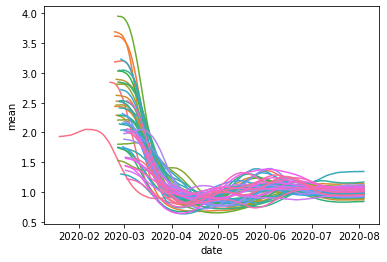

In [39]:
# plot some interesting graphs to visualise
ax = sns.lineplot(x="date", y="mean", hue="state", data=usa_merged_data, legend=False)

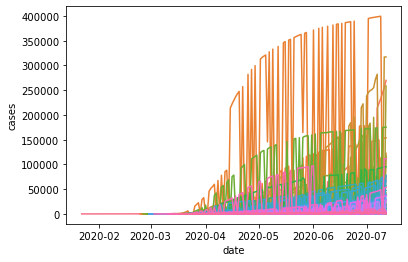

In [40]:
ax = sns.lineplot(x="date", y="cases", hue="state", data=usa_merged_data, legend=False)

### 02vi. Export Data
We save the merged dataset so that in the future, we can jump to the next Section 03 without having to rerun our codes from Section 01 and 02.

In [41]:
# export pre-processed data
usa_merged_data.to_csv('data/usa_merged_data.csv', index=False)

## 03. Feature Engineering

### 03i. Load Data
Run this section if you are skipping Sections 01 & 02, with pre-saved merged data, else, skip to next sub-section 03ii.

In [46]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

usa_merged_data = pd.read_csv('data/usa_merged_data.csv')

In [47]:
# review current available columns
print(usa_merged_data.columns)

Index(['date', 'region', 'mean', 'median', 'lower_80', 'upper_80',
       'infections', 'test_adjusted_positive', 'test_adjusted_positive_raw',
       'positive', 'tests', 'new_tests', 'new_cases', 'new_deaths',
       'state_abbreviation_x', 'state', 'population', 'lat', 'long', 'cases',
       'deaths', 'recovered', 'active', 'tested', 'hospitalized', 'discharged',
       'icu', 'country_region',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'mobility_city_driving',
       'mobility_city_transit', 'mobility_city_walking',
       'mobility_county_driving', 'Level', 'State FIPS', 'State Postal Code',
       'County FIPS', 'County Name', 'Population Staying at Home',
       'Population Not Staying at Home', 'Number

### 03ii. Create Time Labels
We get that time features are important in predicting 'mean of Risk of Transmission' based on Section 02v. Yet including 'date' as a variable into the model seems too specific and granular. We try to create some representations of 'date' by generating month, week and day of week features.

In [48]:
usa_merged_data['date'] = pd.to_datetime(usa_merged_data['date'])
usa_merged_data['month'] = usa_merged_data['date'].apply(lambda x: x.month)
usa_merged_data['week'] = usa_merged_data['date'].apply(lambda x: x.week)
usa_merged_data['weekday'] = usa_merged_data['date'].apply(lambda x: x.weekday())

### 03iii. Clean Missing Variables
In this case, we decided to group by states and sort the values by the date (ascending order). Then, we could fill the missing values of previous valid observation in the event it is missing.

In [49]:
# mean smoothing of variable (e.g. ignore missings/ zeros by filling from last reported qty)

usa_merged_data = (usa_merged_data.groupby('state')
                   .apply(lambda x: x.sort_values('date', ascending=True))
                   .reset_index(drop=True))

def ffill_missing_values_groupby_state(column: str):
    usa_merged_data[column] = usa_merged_data.groupby('state')[column].transform(lambda v: v.ffill())
    
def bfill_missing_values_groupby_state(column: str):
    usa_merged_data[column] = usa_merged_data.groupby('state')[column].transform(lambda v: v.bfill())

In [50]:
index_cols = ['date', 'state']

target_vars_to_lag = [ 'mean', 'median', 'lower_80', 'upper_80', 'infections', 'test_adjusted_positive',
                      'test_adjusted_positive_raw', 'positive', 'tests', 'new_tests',
                      'new_cases', 'new_deaths', 'cases', 'deaths', 'recovered', 'active', 'tested']
mobility_vars_to_lag = ['retail_and_recreation_percent_change_from_baseline',
                        'grocery_and_pharmacy_percent_change_from_baseline',
                        'parks_percent_change_from_baseline',
                        'transit_stations_percent_change_from_baseline',
                        'workplaces_percent_change_from_baseline',
                        'residential_percent_change_from_baseline', 'mobility_city_driving',
                        'mobility_city_transit', 'mobility_city_walking',
                        'mobility_county_driving', 'Population Staying at Home', 'Population Not Staying at Home',
                        'Number of Trips', 'Number of Trips <1', 'Number of Trips 1-3',
                        'Number of Trips 3-5', 'Number of Trips 5-10', 'Number of Trips 10-25',
                        'Number of Trips 25-50', 'Number of Trips 50-100',
                        'Number of Trips 100-250', 'Number of Trips 250-500', 'Number of Trips >=500', 
                        # add season information if applicable here
                        'temperature_median_degC', 'wind_speed_median_m/s']

In [52]:
for var in target_vars_to_lag+mobility_vars_to_lag:
    ffill_missing_values_groupby_state(var)

### 03iv. Create Lagged Variables

In [53]:
usa_merged_data = usa_merged_data.sort_values(by=index_cols, ascending=True)

for var in target_vars_to_lag:
    for lag_num in range(1,15):
        usa_merged_data[var+'_lag_'+str(lag_num)] = usa_merged_data.sort_values('date').groupby(['state'])[var].shift(lag_num)

for var in mobility_vars_to_lag:
    for lag_num in range(7,22):
        usa_merged_data[var+'_lag_'+str(lag_num)] = usa_merged_data.sort_values('date').groupby(['state'])[var].shift(lag_num)

In [54]:
print(list(usa_merged_data.columns))

['date', 'region', 'mean', 'median', 'lower_80', 'upper_80', 'infections', 'test_adjusted_positive', 'test_adjusted_positive_raw', 'positive', 'tests', 'new_tests', 'new_cases', 'new_deaths', 'state_abbreviation_x', 'state', 'population', 'lat', 'long', 'cases', 'deaths', 'recovered', 'active', 'tested', 'hospitalized', 'discharged', 'icu', 'country_region', 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline', 'mobility_city_driving', 'mobility_city_transit', 'mobility_city_walking', 'mobility_county_driving', 'Level', 'State FIPS', 'State Postal Code', 'County FIPS', 'County Name', 'Population Staying at Home', 'Population Not Staying at Home', 'Number of Trips', 'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5', 'Number of Trips 5-10', 'Number

In [55]:
# create_lagged_averages
for var in target_vars_to_lag:
    usa_merged_data[var+'_lag_past4days'] = usa_merged_data[var+'_lag_1']+usa_merged_data[var+'_lag_2']+usa_merged_data[var+'_lag_3']+usa_merged_data[var+'_lag_4']
    usa_merged_data[var+'_lag_1_past4days'] = usa_merged_data[var+'_lag_2']+usa_merged_data[var+'_lag_3']+usa_merged_data[var+'_lag_4']+usa_merged_data[var+'_lag_5']
    usa_merged_data[var+'_lag_2_past4days'] = usa_merged_data[var+'_lag_3']+usa_merged_data[var+'_lag_4']+usa_merged_data[var+'_lag_5']+usa_merged_data[var+'_lag_6']
    usa_merged_data[var+'_lag_3_past4days'] = usa_merged_data[var+'_lag_4']+usa_merged_data[var+'_lag_5']+usa_merged_data[var+'_lag_6']+usa_merged_data[var+'_lag_7']
    usa_merged_data[var+'_lag_4_past4days'] = usa_merged_data[var+'_lag_5']+usa_merged_data[var+'_lag_6']+usa_merged_data[var+'_lag_7']+usa_merged_data[var+'_lag_8']
    usa_merged_data[var+'_lag_5_past4days'] = usa_merged_data[var+'_lag_6']+usa_merged_data[var+'_lag_7']+usa_merged_data[var+'_lag_8']+usa_merged_data[var+'_lag_9']
    usa_merged_data[var+'_lag_6_past4days'] = usa_merged_data[var+'_lag_7']+usa_merged_data[var+'_lag_8']+usa_merged_data[var+'_lag_9']+usa_merged_data[var+'_lag_10']
    usa_merged_data[var+'_lag_7_past4days'] = usa_merged_data[var+'_lag_8']+usa_merged_data[var+'_lag_9']+usa_merged_data[var+'_lag_10']+usa_merged_data[var+'_lag_7']
    
    usa_merged_data[var+'_lag_pastweek'] = usa_merged_data[var+'_lag_past4days'] + usa_merged_data[var+'_lag_5']+usa_merged_data[var+'_lag_6']+usa_merged_data[var+'_lag_7']
    usa_merged_data[var+'_lag_lastweek'] = usa_merged_data[var+'_lag_8']+usa_merged_data[var+'_lag_9']+usa_merged_data[var+'_lag_10']+usa_merged_data[var+'_lag_11']+usa_merged_data[var+'_lag_12']+usa_merged_data[var+'_lag_13']+usa_merged_data[var+'_lag_14']
    
    usa_merged_data[var+'_lag_past4days'] /= 4
    usa_merged_data[var+'_lag_1_past4days'] /=4
    usa_merged_data[var+'_lag_2_past4days'] /=4
    usa_merged_data[var+'_lag_3_past4days'] /=4
    usa_merged_data[var+'_lag_4_past4days'] /=4
    usa_merged_data[var+'_lag_5_past4days'] /=4
    usa_merged_data[var+'_lag_6_past4days'] /=4
    usa_merged_data[var+'_lag_7_past4days'] /=4
    
    usa_merged_data[var+'_lag_pastweek'] /= 7
    usa_merged_data[var+'_lag_lastweek'] /= 7
    
for var in mobility_vars_to_lag:
    usa_merged_data[var+'_lag_lastweek'] = usa_merged_data[var+'_lag_8']+usa_merged_data[var+'_lag_9']+usa_merged_data[var+'_lag_10']+usa_merged_data[var+'_lag_11']+usa_merged_data[var+'_lag_12']+usa_merged_data[var+'_lag_13']+usa_merged_data[var+'_lag_14']
    usa_merged_data[var+'_lag_lastmidweek'] = usa_merged_data[var+'_lag_11']+usa_merged_data[var+'_lag_12']+usa_merged_data[var+'_lag_13']+usa_merged_data[var+'_lag_14']+usa_merged_data[var+'_lag_15']+usa_merged_data[var+'_lag_16']+usa_merged_data[var+'_lag_17']
    usa_merged_data[var+'_lag_lastlastweek'] = usa_merged_data[var+'_lag_15']+usa_merged_data[var+'_lag_16']+usa_merged_data[var+'_lag_17']+usa_merged_data[var+'_lag_18']+usa_merged_data[var+'_lag_19']+usa_merged_data[var+'_lag_20']+usa_merged_data[var+'_lag_21']
    
    usa_merged_data[var+'_lag_lastweek'] /= 7
    usa_merged_data[var+'_lag_lastmidweek'] /= 7
    usa_merged_data[var+'_lag_lastlastweek'] /= 7

In [56]:
# review created lagged variables that will be included into the model
print([i for i in usa_merged_data.columns if ('_past' in i) or ('lag_last' in i)])

['mean_lag_past4days', 'mean_lag_1_past4days', 'mean_lag_2_past4days', 'mean_lag_3_past4days', 'mean_lag_4_past4days', 'mean_lag_5_past4days', 'mean_lag_6_past4days', 'mean_lag_7_past4days', 'mean_lag_pastweek', 'mean_lag_lastweek', 'median_lag_past4days', 'median_lag_1_past4days', 'median_lag_2_past4days', 'median_lag_3_past4days', 'median_lag_4_past4days', 'median_lag_5_past4days', 'median_lag_6_past4days', 'median_lag_7_past4days', 'median_lag_pastweek', 'median_lag_lastweek', 'lower_80_lag_past4days', 'lower_80_lag_1_past4days', 'lower_80_lag_2_past4days', 'lower_80_lag_3_past4days', 'lower_80_lag_4_past4days', 'lower_80_lag_5_past4days', 'lower_80_lag_6_past4days', 'lower_80_lag_7_past4days', 'lower_80_lag_pastweek', 'lower_80_lag_lastweek', 'upper_80_lag_past4days', 'upper_80_lag_1_past4days', 'upper_80_lag_2_past4days', 'upper_80_lag_3_past4days', 'upper_80_lag_4_past4days', 'upper_80_lag_5_past4days', 'upper_80_lag_6_past4days', 'upper_80_lag_7_past4days', 'upper_80_lag_pastwee

### 03v. Export Data
We save the feature engineered dataset so that in the future, we can jump to the next Section 04 without having to rerun our codes from Section 03.

In [57]:
usa_merged_data.to_csv('data/usa_merged_data_fe.csv', index=False)

## 04. Modelling

### 04i. Import Packages
We import packages required for modelling.

In [58]:
import lightgbm as lgb
import seaborn as sns
import datetime 
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### 04ii. Load Data
Run this section if you are skipping Sections 03, with pre-saved feature engineered data, else, skip to next sub-section 04iii.

In [46]:
usa_merged_data = pd.read_csv('data/usa_merged_data_fe.csv')

In [59]:
print(usa_merged_data.columns)

Index(['date', 'region', 'mean', 'median', 'lower_80', 'upper_80',
       'infections', 'test_adjusted_positive', 'test_adjusted_positive_raw',
       'positive',
       ...
       'Number of Trips 250-500_lag_lastlastweek',
       'Number of Trips >=500_lag_lastweek',
       'Number of Trips >=500_lag_lastmidweek',
       'Number of Trips >=500_lag_lastlastweek',
       'temperature_median_degC_lag_lastweek',
       'temperature_median_degC_lag_lastmidweek',
       'temperature_median_degC_lag_lastlastweek',
       'wind_speed_median_m/s_lag_lastweek',
       'wind_speed_median_m/s_lag_lastmidweek',
       'wind_speed_median_m/s_lag_lastlastweek'],
      dtype='object', length=922)


### 04iii. Set Model Variables
We set model variables here so that they are easy to change and play around with later.
Note that for lgbm package, we need to format categorical variables astype 'category'.

In [96]:
# Input variables
data = usa_merged_data.copy()
cat_var = ['month', 'week', 'weekday', 'lockdown_status', 'state']
# num_var = [i for i in usa_merged_data.columns if ('lag_past' in i) or ('lag_last' in i)]
# try without past4 info
# 'temperature_median_degC', 'wind_speed_median_m/s'
num_var = [i for i in usa_merged_data.columns if ('lag_past' in i) or ('lag_last' in i)]+['long', 'lat']
# remove the following line if you want to include weather
num_var = [i for i in num_var if ('temperature_' not in i) and ('wind_speed' not in i)]

df_train_columns = cat_var + num_var
for column in cat_var:
    data[column] =  data[column].astype('category')
    
# Outcome variables
target_var = 'mean'

# Define Date Columns
date_variable = 'date'
data[date_variable] = pd.to_datetime(data[date_variable])

### 04iv. Quick Visualisations

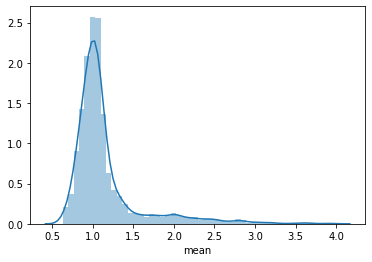

In [97]:
# to review if target_var is too skewed and might be problematic
sns.distplot(data[target_var])

Text(0.5, 1.0, 'Date distribution')

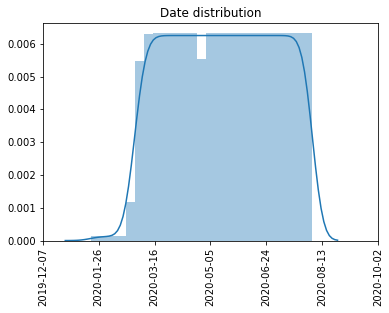

In [98]:
# code solution: https://github.com/mwaskom/seaborn/issues/1059
ordinal_dates = np.array([d.toordinal() for d in data[date_variable]])
sns.distplot(ordinal_dates, kde=True)
ticks_locations, _ = plt.xticks()
labels = [datetime.datetime.fromordinal(int(t)).date() for t in ticks_locations]
plt.xticks(ticks_locations, labels, rotation=90)
plt.title("Date distribution")

### 04v. Train-Test-Val-Split
By reviewing the date distribution plot above, we get a sense of how much data we have roughly, and where we can split our train-test-val by. Instead of random splits, we are choosing to split by time as in the real world, we are going to be using past information to predict the future.<br>
We want to replicate this ordinal format of forecasting, so that we don't end up overfitting on specific dates that can be 'seen' from using a random split.

In [99]:
# Model Parameters
validate_from = '2020-06-01' 
train_till = '2020-07-01'

# Train Test Split
data[date_variable] = pd.to_datetime(data[date_variable])

main_data = data[data[date_variable] < pd.to_datetime(train_till)].copy()
test = data[data[date_variable] >= pd.to_datetime(train_till)].copy()

train = main_data[main_data[date_variable] < pd.to_datetime(validate_from)].copy()
val = main_data[main_data[date_variable] >= pd.to_datetime(validate_from)].copy()

# Format data for Model
X_train = train[df_train_columns]
y_train = train[target_var]

X_val = val[df_train_columns]
y_val = val[target_var]

# Ensure sufficient data per set
print(len(train))
print(len(val))
print(len(test))

4846
1530
1785


### 04vi. Train Model
With lgb module, training of the model is straightforward by formatting the data into lgbm data containers, then running the lgb.train function. Here, we are using some default model parameters, although in the future we intend to use cross-validation to perform hyperparameter tuning.<br>
Nevertheless, our current model performs well enough, and hence this was de-prioritised for now (we instead focused our efforts more on data cleaning, feature engineering and generation).

In [100]:
# Create the LightGBM data containers
lgb_train = lgb.Dataset(X_train, label=y_train, categorical_feature=cat_var)
lgb_val = lgb.Dataset(X_val, label=y_val)

# to record eval results for plotting
evals_result = {} 

# Train the model
parameters = {
    'random_state':0,
    'application': 'regression',
    'objective': 'regression',
    'metric': ["mse"],
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 30,
    'max_depth':5,
    'min_data_in_leaf': 50,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0,
    'num_iterations': 300
}
# parameters = {
#     'application': 'regression',
#     'objective': 'regression',
#     'metric': ["mse"],
#     'is_unbalance': 'true',
#     'boosting': 'gbdt',
#     'num_leaves': 500,
#     'feature_fraction': 0.5,
#     'bagging_fraction': 0.5,
#     'bagging_freq': 20,
#     'learning_rate': 0.05,
#     'verbose': 0
# }

model = lgb.train(parameters,
                  lgb_train,
                  valid_sets=lgb_val,
                  num_boost_round=100,
                  evals_result=evals_result,
                  early_stopping_rounds=30)

[1]	valid_0's l2: 0.0289487
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l2: 0.0260767
[3]	valid_0's l2: 0.0234743
[4]	valid_0's l2: 0.0211727
[5]	valid_0's l2: 0.0190829
[6]	valid_0's l2: 0.0172103
[7]	valid_0's l2: 0.01552
[8]	valid_0's l2: 0.0140386
[9]	valid_0's l2: 0.012656
[10]	valid_0's l2: 0.0114365
[11]	valid_0's l2: 0.0103037
[12]	valid_0's l2: 0.00930336
[13]	valid_0's l2: 0.00839128
[14]	valid_0's l2: 0.00760197
[15]	valid_0's l2: 0.00682496
[16]	valid_0's l2: 0.00618195
[17]	valid_0's l2: 0.00555224
[18]	valid_0's l2: 0.00503422
[19]	valid_0's l2: 0.00454738
[20]	valid_0's l2: 0.00412645
[21]	valid_0's l2: 0.00372758
[22]	valid_0's l2: 0.00335753
[23]	valid_0's l2: 0.00301619
[24]	valid_0's l2: 0.00274588
[25]	valid_0's l2: 0.00249482
[26]	valid_0's l2: 0.00226066
[27]	valid_0's l2: 0.00205619
[28]	valid_0's l2: 0.00187402
[29]	valid_0's l2: 0.00170874
[30]	valid_0's l2: 0.00156611
[31]	valid_0's l2: 0.00141618
[32]	valid_0's l2: 0.00129217
[3

### 04vii. Predict & Review
With a trained model, we forecast on train, val and test dataset altogether and review by calculating the RMSE and visualising the scatterplot of actual vs predicted y values.

##### Create RMSE Functions

In [101]:
# Baseline Error
def get_rmse(predicted, actual):
    rmse = ((predicted - actual) ** 2).mean() ** .5
    return rmse

import matplotlib.pyplot as plt
        
def plot_relation(predicted, actual, xlimit=0, ylimit=5):
    plt.figure(figsize=(10, 5))
    
    df_pred = pd.DataFrame({'Actual Outcome':actual, \
                            'Predict Outcome': predicted})

    plt.scatter(df_pred['Actual Outcome'], df_pred['Predict Outcome'])

    plt.xlabel('Actual Outcome')
    plt.ylabel('Predict Outcome')
    plt.plot([xlimit,ylimit], [xlimit,ylimit], 'r--', label='Reference Line')
    plt.show()

Train:  0.10875496010735337


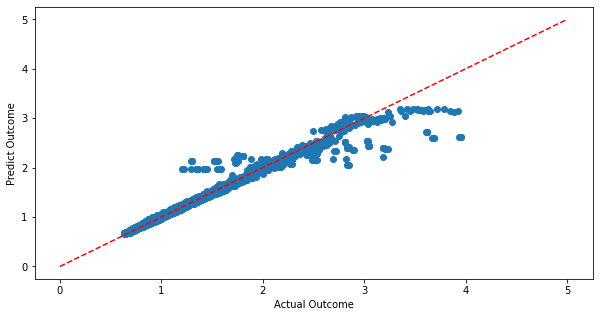

Validate:  0.01492617079504424


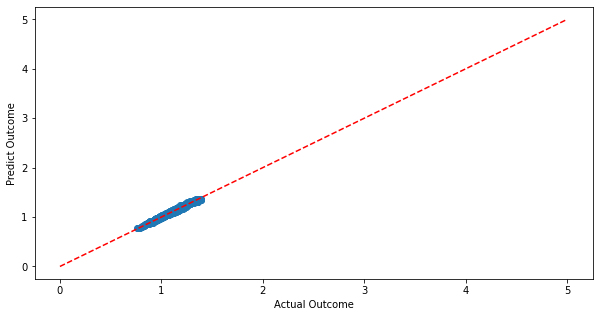

Test:  0.016047635889911323


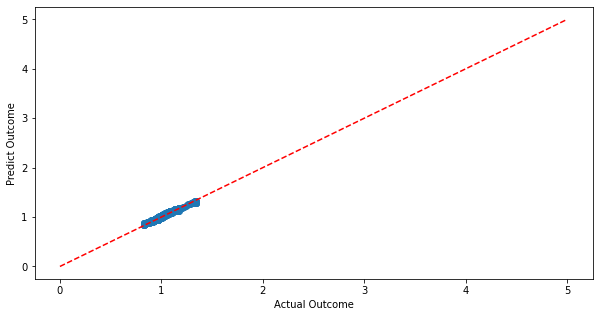

In [102]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(test[df_train_columns])

# Visualise
print('Train: ', get_rmse(y_train_pred, y_train))
plot_relation(y_train_pred, y_train, xlimit=0)

print('Validate: ', get_rmse(y_val_pred, y_val))
plot_relation(y_val_pred, y_val, xlimit=0)

print('Test: ', get_rmse(y_test_pred, test[target_var]))
plot_relation(y_test_pred, test[target_var], xlimit=0)

##### Visualise feature importance
Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable. - [MLMastery](https://machinelearningmastery.com/calculate-feature-importance-with-python/#:~:text=Feature%20importance%20refers%20to%20techniques,at%20predicting%20a%20target%20variable)<br>
We want to get an intuition of which variables are helping predict our model, and so have the following chart to review.

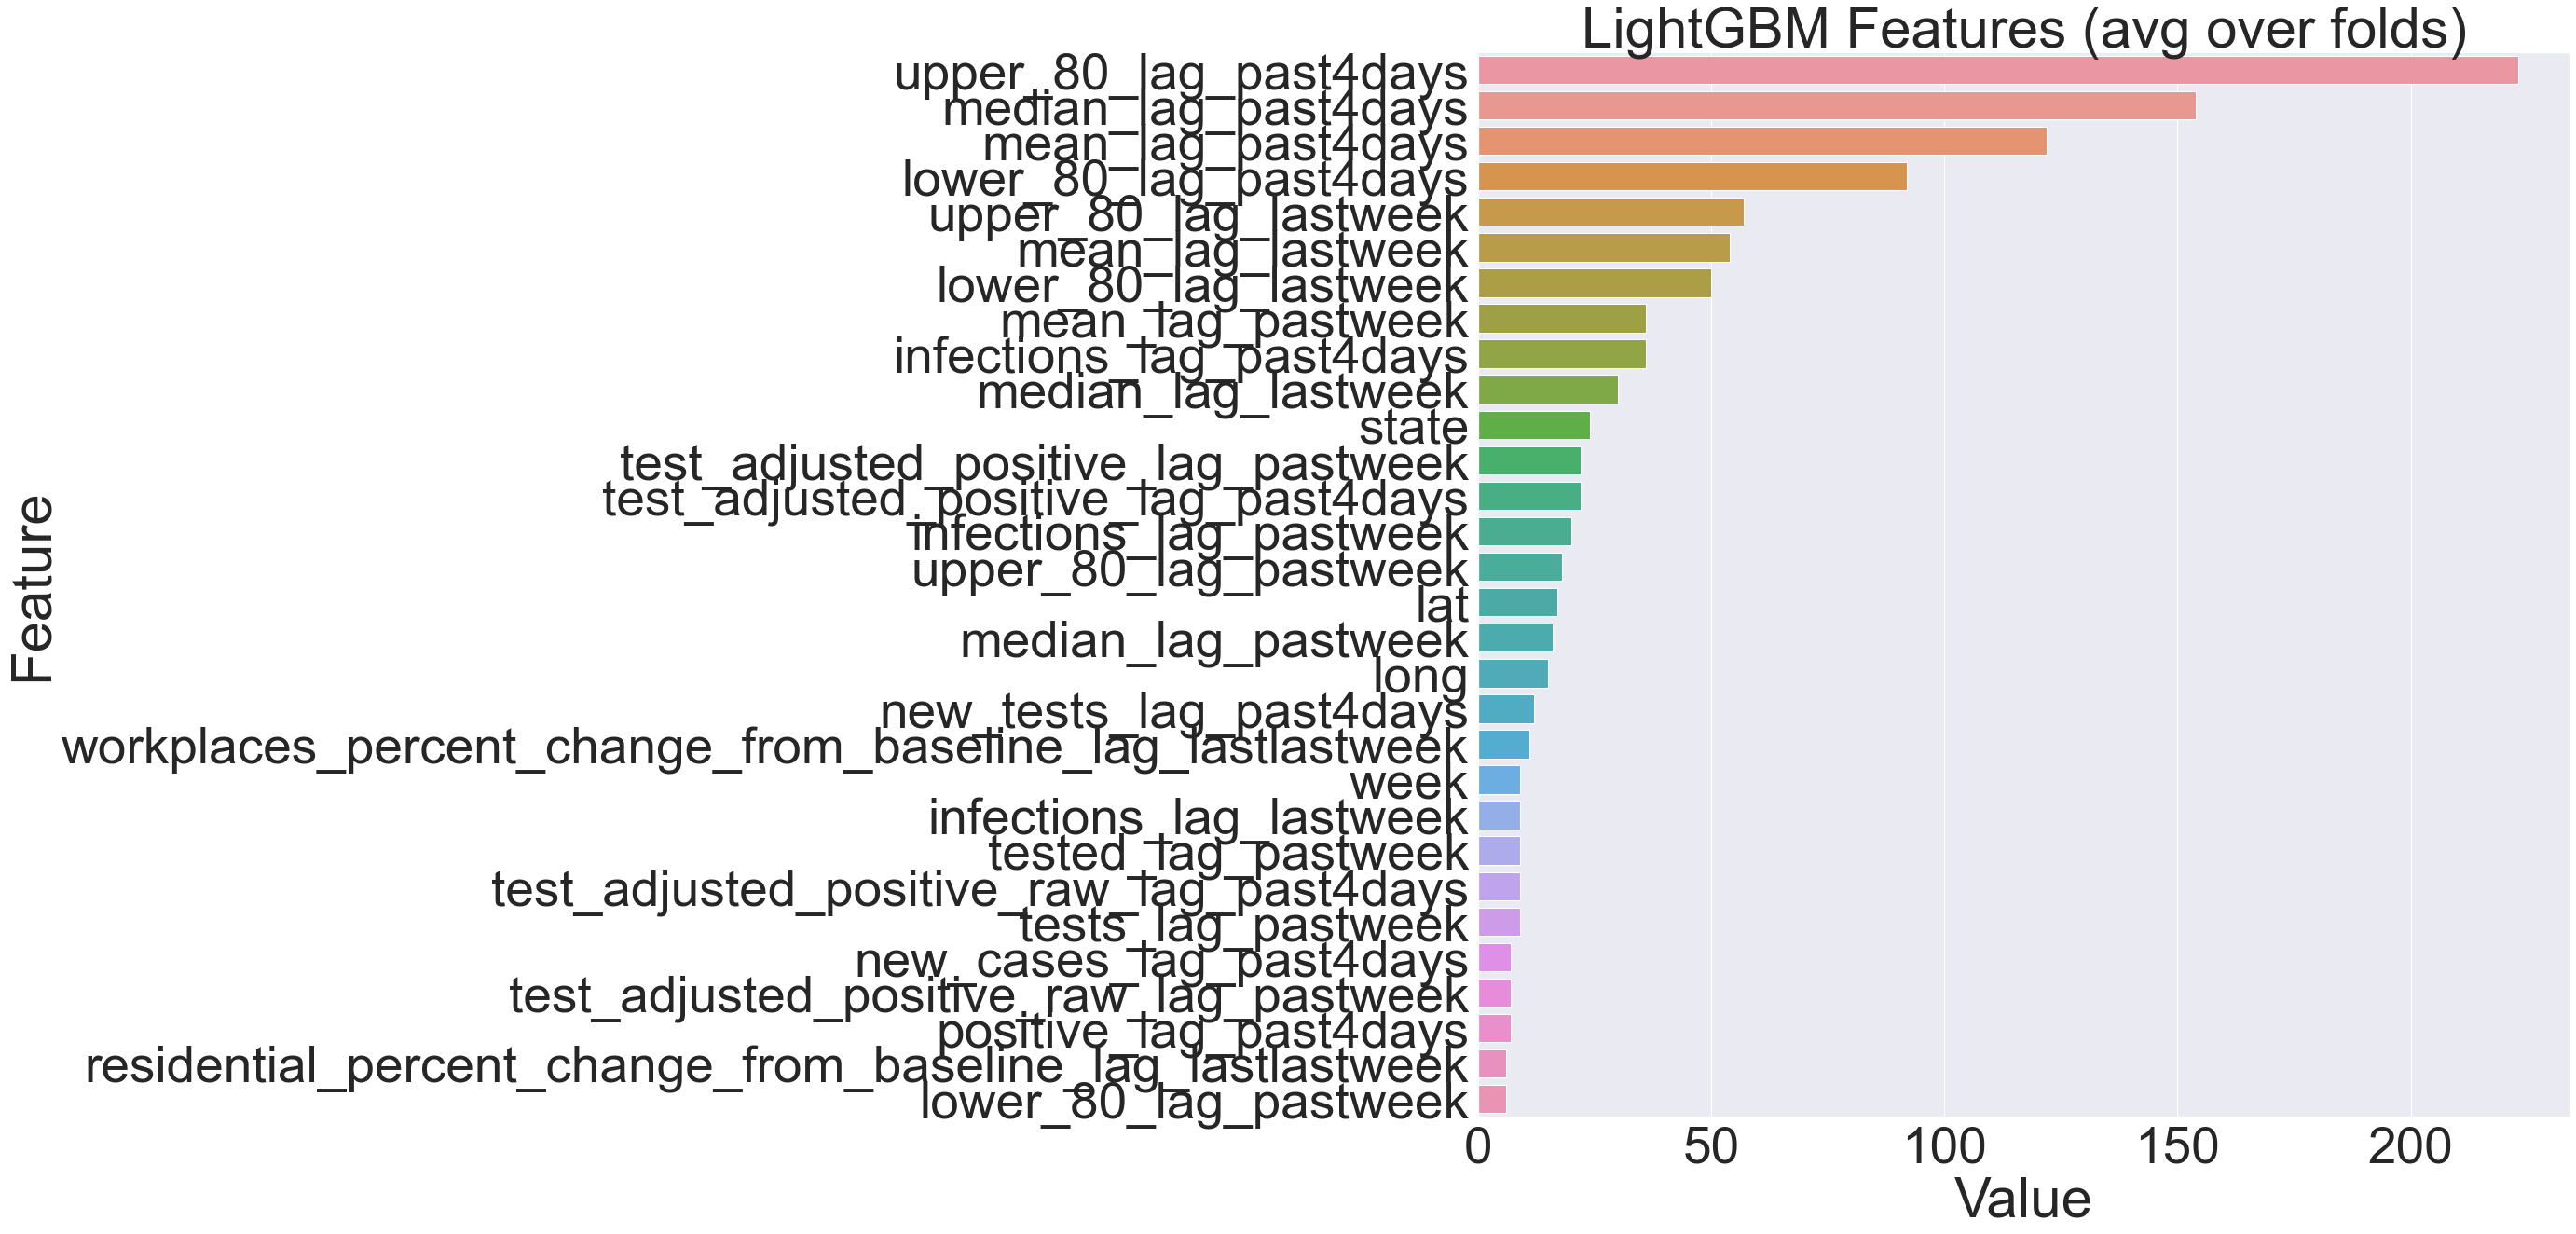

In [104]:
def plotImp(model, X , num = 20):
    feature_imp = pd.DataFrame({'Value':model.feature_importance(),'Feature':X.columns})
    plt.figure(figsize=(40, 20))
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances-01.png')
    plt.show()
    
plotImp(model, X_train, num=30)

### 04viii. Export Data
The following section exports actual vs predicted variables by index columns for the purpose of plotting visualisations (E.g. on Tableau).

In [70]:
output_cols = index_cols

train_output = train[output_cols].copy()
train_output[target_var+'_actual'] = y_train
train_output[target_var+'_pred'] = y_train_pred
train_output['dataset_type'] = 'train'

val_output = val[output_cols].copy()
val_output[target_var+'_actual'] = y_val
val_output[target_var+'_pred'] = y_val_pred
val_output['dataset_type'] = 'validation'

test_output = test[output_cols].copy()
test_output[target_var+'_actual'] = test[target_var]
test_output[target_var+'_pred'] = y_test_pred
test_output['dataset_type'] = 'test'

final_output = pd.concat([pd.concat([train_output, val_output]),test_output]).reset_index(drop=True)

final_output.to_csv('data/usa_pred_vs_actual.csv', index=False)

## 05. Extensions
In the following section, we are exploring how far back we can lag data to still get a reasonable forecast. We hope to go as far back as possible, as that highlights the strength of our model to forecast far into the future.

In [71]:
def run_lgb_model(data, cat_var, num_var, target_var, date_variable, parameters,
                  validate_from = '2020-06-01', train_till = '2020-07-01', see_output = False):
    
    # Set up
    df_train_columns = cat_var + num_var
    for column in cat_var:
        data[column] =  data[column].astype('category')
    data[date_variable] = pd.to_datetime(data[date_variable])
    
    # Model Parameters


    # Train Test Split
    data[date_variable] = pd.to_datetime(data[date_variable])

    main_data = data[data[date_variable] < pd.to_datetime(train_till)].copy()
    test = data[data[date_variable] >= pd.to_datetime(train_till)].copy()

    train = main_data[main_data[date_variable] < pd.to_datetime(validate_from)].copy()
    val = main_data[main_data[date_variable] >= pd.to_datetime(validate_from)].copy()

    # Format data for Model
    X_train = train[df_train_columns]
    y_train = train[target_var]

    X_val = val[df_train_columns]
    y_val = val[target_var]
    
    # Create the LightGBM data containers
    lgb_train = lgb.Dataset(X_train, label=y_train, categorical_feature=cat_var)
    lgb_val = lgb.Dataset(X_val, label=y_val)

    # to record eval results for plotting
    evals_result = {} 

    # Train the model
    model = lgb.train(parameters,
                      lgb_train,
                      valid_sets=lgb_val,
                      num_boost_round=100,
                      evals_result=evals_result,
                      early_stopping_rounds=30,
                      verbose_eval = see_output)
    
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(test[df_train_columns])

    # Visualise
    
    if see_output:
        print('Train: ', get_rmse(y_train_pred, y_train))
        plot_relation(y_train_pred, y_train, xlimit=0)

        print('Validate: ', get_rmse(y_val_pred, y_val))
        plot_relation(y_val_pred, y_val, xlimit=0)

        print('Test: ', get_rmse(y_test_pred, test[target_var]))
        plot_relation(y_test_pred, test[target_var], xlimit=0)
    
    return [get_rmse(y_train_pred, y_train), get_rmse(y_val_pred, y_val), get_rmse(y_test_pred, test[target_var])]

In [72]:
variations_df = pd.DataFrame()

for lag in range(0, 8):
    if lag == 0:
        num_var = [i for i in usa_merged_data.columns if ('lag_past' in i) or ('lag_last' in i)]
    else:
        num_var = [i for i in usa_merged_data.columns if ('_lag_'+str(lag)+'_past4days' in i) or ('lag_last' in i)]
    lag_row = run_lgb_model(data, cat_var, num_var, target_var, date_variable, parameters)
    variations_df = variations_df.append([lag_row])

variations_df = variations_df.reset_index(drop=True)
variations_df.columns = ['Train_RMSE', 'Val_RMSE', 'Test_RMSE']
variations_df

,Train_RMSE,Val_RMSE,Test_RMSE
0,0.079716,0.012717,0.014533
1,0.093510,0.017935,0.018506
2,0.136287,0.029054,0.024386
3,0.152229,0.039885,0.038381
4,0.166353,0.049936,0.045152
5,0.189122,0.056863,0.053155
6,0.241752,0.069258,0.068007
7,0.241752,0.069258,0.068007


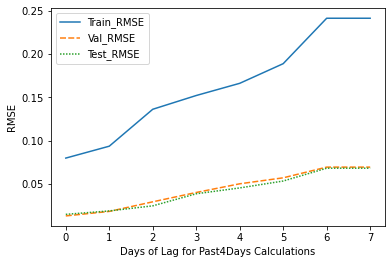

In [73]:
g = sns.lineplot(data=variations_df) 
g.set_xticklabels([i for i in range(-1,8)])
g.set(xlabel='Days of Lag for Past4Days Calculations', ylabel='RMSE')
plt.show()